In [1]:
import os
import tempfile
import scanpy as sc
import scvi
import seaborn as sns
import torch
import anndata
import numpy as np

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex"

In [3]:
adata_train = sc.read(os.path.join(output_dir, "adata_train_biolord_split_30.h5ad"))
adata_test = sc.read(os.path.join(output_dir, "adata_test_biolord_split_30.h5ad"))
adata_ood = sc.read(os.path.join(output_dir, "adata_ood_biolord_split_30.h5ad")) 

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata_orig = sc.read("data/sciplex3.h5ad")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [25]:
adata_orig.obs.columns

Index(['cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score',
       'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2',
       'product_dose', 'product_name', 'proliferation_index', 'replicate',
       'size_factor', 'target', 'vehicle'],
      dtype='object')

In [5]:
adata_train.layers["raw_counts"] = adata_orig[adata_train.obs_names, adata_train.var_names].X
adata_test.layers["raw_counts"] = adata_orig[adata_test.obs_names, adata_train.var_names].X
adata_ood.layers["raw_counts"] = adata_orig[adata_ood.obs_names, adata_train.var_names].X

In [6]:
scvi.model.JaxSCVI.setup_anndata(adata_train, layer="raw_counts")

In [11]:
model = scvi.model.JaxSCVI(adata_train, n_hidden=1024, n_layers=3, dropout_rate=0.2)

In [12]:
model.train(early_stopping=True, max_epochs=500)

INFO     Jax module moved to cuda:0.Note: Pytorch lightning will show GPU is not being used for the Trainer.       


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/dominik.klein/mambaforge/envs/ot_pert_geno ...
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/dominik.klein/mambaforge/envs/ot_pert_geno ...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/lightni

Epoch 286/500:  57%|█████▋    | 285/500 [52:20<36:45, 10.26s/it, v_num=1, train_loss_step=155, train_loss_epoch=164]  

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


<Axes: xlabel='epoch'>

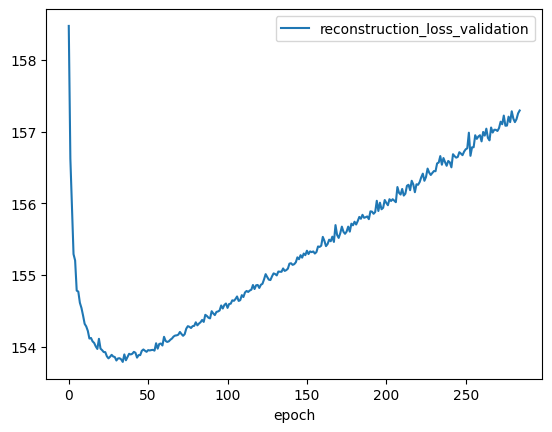

In [17]:
model.history['reconstruction_loss_validation'].plot()


<Axes: xlabel='epoch'>

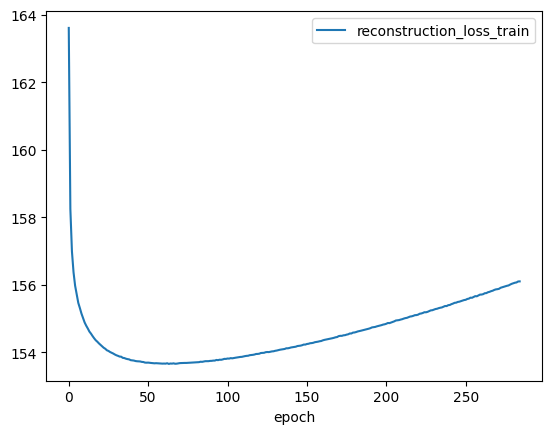

In [18]:
model.history['reconstruction_loss_train'].plot()

In [24]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_adata',
 '_adata_manager',
 '_check_if_trained',
 '_create_modalities_attr_dict',
 '_data_loader_cls',
 '_data_splitter_cls',
 '_get_init_params',
 '_get_most_recent_anndata_manager',
 '_get_setup_method_args',
 '_get_user_attributes',
 '_make_data_loader',
 '_model_summary_string',
 '_module_cls',
 '_module_init_on_train',
 '_per_instance_manager_store',
 '_register_manager_for_instance',
 '_setup_adata_manager_store',
 '_train_runner_cls',
 '_training_plan_cls',
 '_tunables',
 '_validate_anndata',
 'adata',
 'adata_manager',
 'convert_legacy_save',
 'deregister_ma

In [11]:
model_dir = os.path.join("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex", "scvi_sciplex")
model.save(model_dir, overwrite=True)

In [19]:
SCVI_LATENT_KEY = "X_scVI"
adata_train.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [13]:
adata_train.write(os.path.join(output_dir, "adata_train_biolord_split_all_30.h5ad"))

KeyboardInterrupt: 

In [20]:
sc.pp.neighbors(adata_train, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata_train)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot_scvi/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

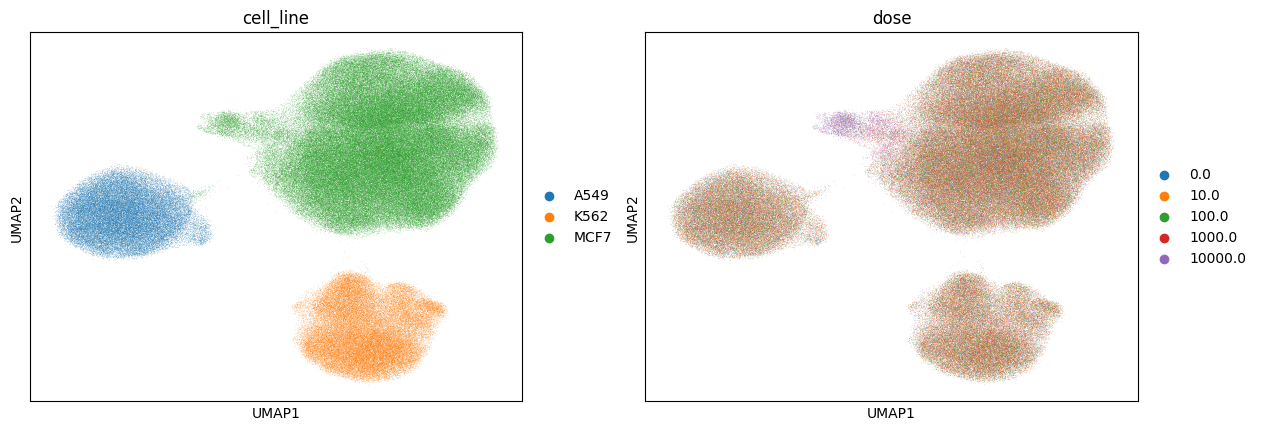

In [21]:
sc.pl.umap(adata_train, color=["cell_line", "dose"])

In [22]:
adata_train.layers["reconstruction"] = model.get_normalized_expression()

AttributeError: 'JaxSCVI' object has no attribute 'get_normalized_expression'

In [23]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_adata',
 '_adata_manager',
 '_check_if_trained',
 '_create_modalities_attr_dict',
 '_data_loader_cls',
 '_data_splitter_cls',
 '_get_init_params',
 '_get_most_recent_anndata_manager',
 '_get_setup_method_args',
 '_get_user_attributes',
 '_make_data_loader',
 '_model_summary_string',
 '_module_cls',
 '_module_init_on_train',
 '_per_instance_manager_store',
 '_register_manager_for_instance',
 '_setup_adata_manager_store',
 '_train_runner_cls',
 '_training_plan_cls',
 '_tunables',
 '_validate_anndata',
 'adata',
 'adata_manager',
 'convert_legacy_save',
 'deregister_ma

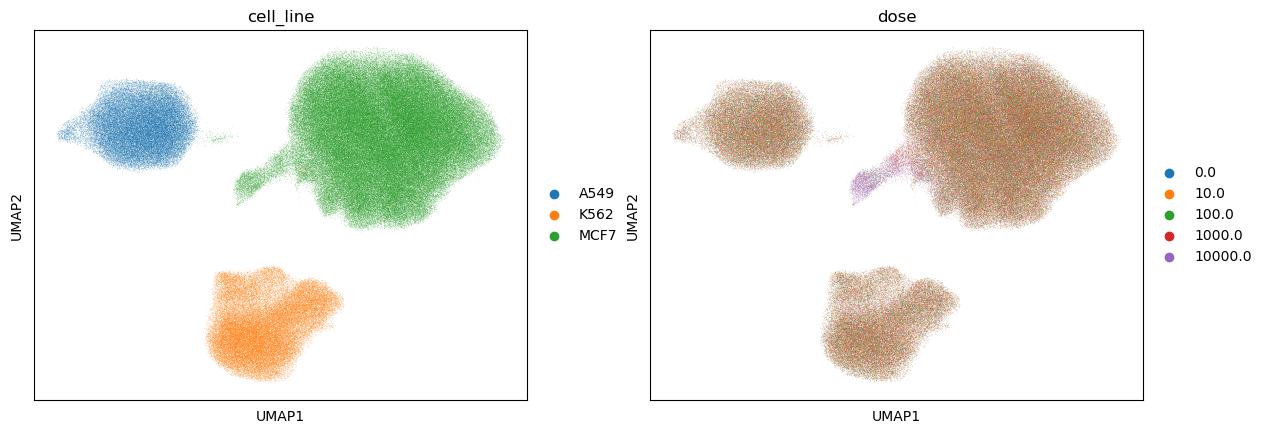

In [15]:
sc.pl.umap(adata_train, color=["cell_line", "dose"])

In [16]:
adata_test.obsm[SCVI_LATENT_KEY] = model.get_latent_representation(adata_test)

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup       


/home/icb/dominik.klein/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/core/scope.py:740: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  abs_value_flat = jax.tree_leaves(abs_value)
/home/icb/dominik.klein/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/core/scope.py:741: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  value_flat = jax.tree_leaves(value)


In [17]:
adata_ood.obsm[SCVI_LATENT_KEY] = model.get_latent_representation(adata_ood)

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup       


/home/icb/dominik.klein/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/core/scope.py:740: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  abs_value_flat = jax.tree_leaves(abs_value)
/home/icb/dominik.klein/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/core/scope.py:741: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  value_flat = jax.tree_leaves(value)


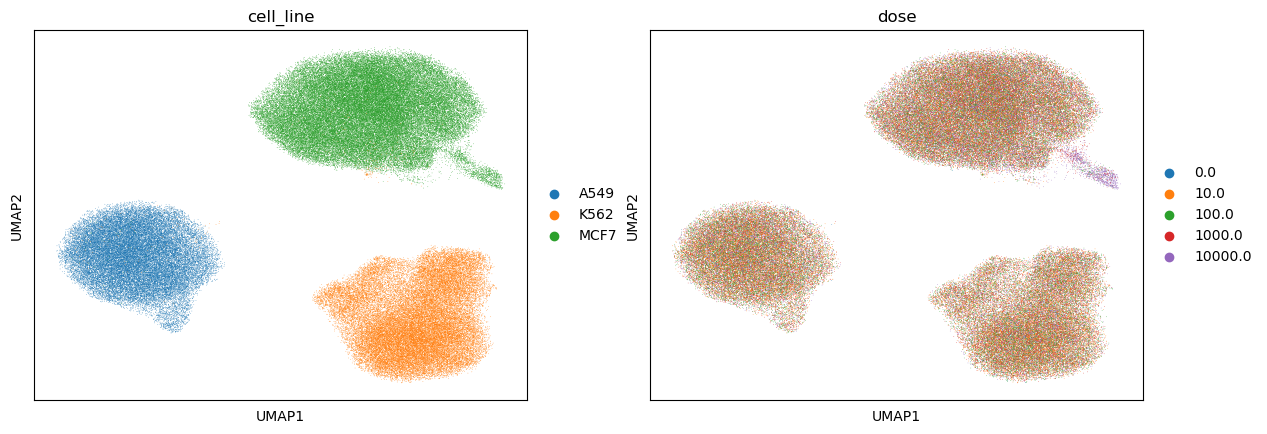

In [18]:
sc.pp.neighbors(adata_test, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata_test)
sc.pl.umap(adata_test, color=["cell_line", "dose"])

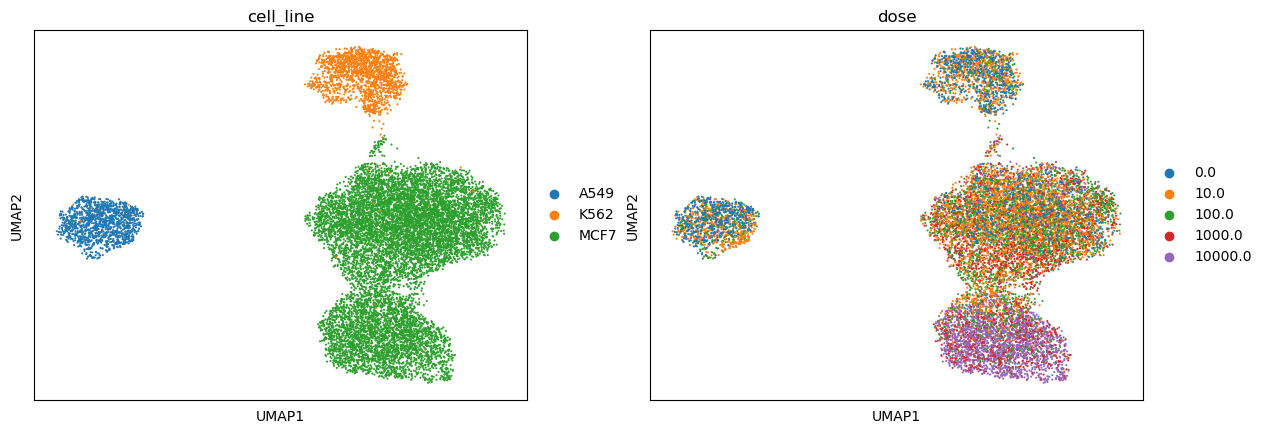

In [19]:
sc.pp.neighbors(adata_ood, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata_ood)
sc.pl.umap(adata_ood, color=["cell_line", "dose"])

In [23]:
adata_train.write(os.path.join(output_dir, "adata_train_biolord_split_30_scvi.h5ad"))
adata_test.write(os.path.join(output_dir, "adata_test_biolord_split_30_scvi.h5ad")) 
adata_ood.write(os.path.join(output_dir, "adata_ood_biolord_split_30_scvi.h5ad")) 